In [1]:
#The purpose of this document is to specify the requirements for the project “California Housing Price Prediction.” Apart from specifying the functional and non-functional requirements for the project, it also serves as an input for project scoping.

#The purpose of the project is to predict median house values in Californian districts, given many features from these districts. The project also aims at building a model of housing prices in California using the California census data. The data has metrics such as the population, median income, median housing price, and so on for each block group in California. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics. Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset. Bonus Exercise: Predict housing prices based on median_income and plot the regression chart.

#Description: The project "California Housing Price Prediction" is to predict median house values in Californian districts, given many features from these districts. We build a model of housing prices in California using the census data. A detailed project problem statement and the housing dataset can be found in the downloads section of learning tools.

In [2]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style='ticks')

In [3]:
#Step 1: Load the data

#Read the “Housing.csv” file from the folder into the program. Print first few rows of this data. Extract input (X) and output (y) data from the dataset.
2

df_housing = pd.read_csv("C:/Users/zanderl/Documents/housing.csv")

X = df_housing.iloc [:,:-1].values
y = df_housing.iloc[:,-1].values

In [4]:
#understand the shape - rows and columns - of the housing dataset
df_housing.shape

(20640, 10)

In [5]:
# verifying df_housing is a dataframe
type(df_housing)

pandas.core.frame.DataFrame

In [6]:
#view the first five rows of the housing dataset
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


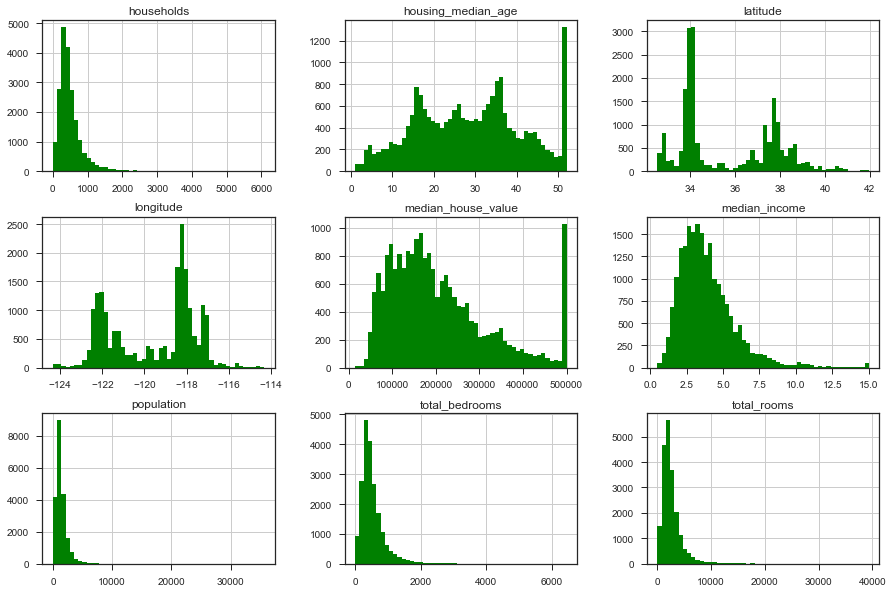

In [7]:
#Visualize distribution of results
df_housing.hist(bins=50, figsize=(15,10), color = 'green');

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


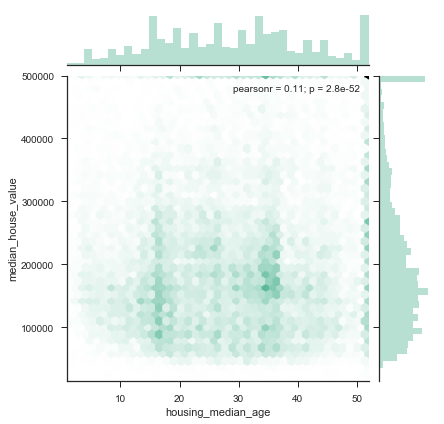

In [8]:
sns.jointplot(df_housing['housing_median_age'],
              df_housing['median_house_value'],
              kind='hex',size=6,color='#4CB391');

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


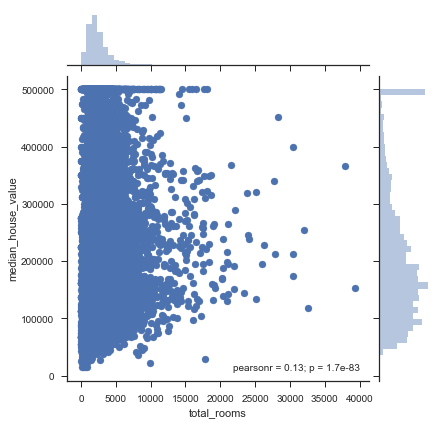

In [9]:
sns.jointplot(df_housing['total_rooms'],df_housing['median_house_value'],size=6);

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


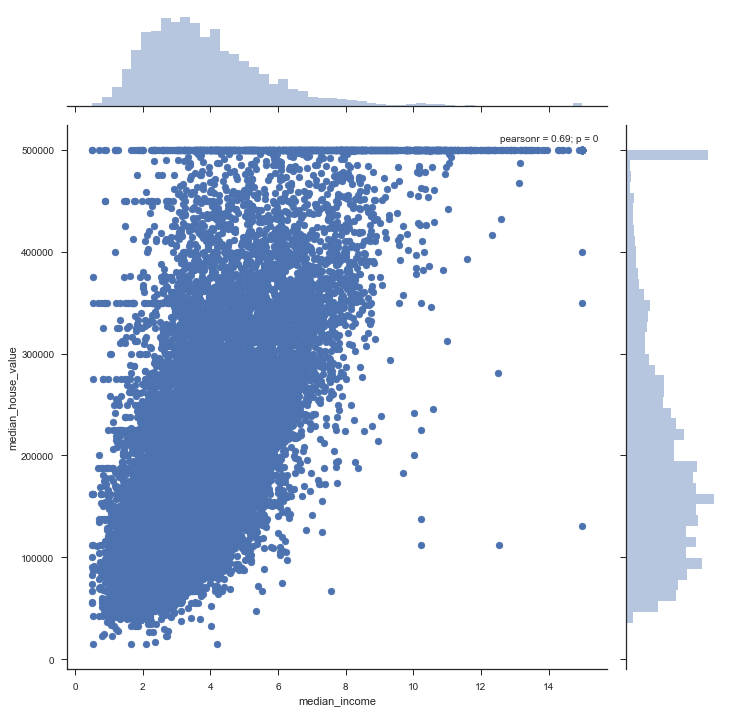

In [10]:
sns.jointplot(df_housing['median_income'],df_housing['median_house_value'],size=10);

In [11]:
#view the columns in the housing dataset after storing them as features
housing_features = df_housing.columns

print(housing_features)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


In [12]:
#Describe each feature

print("Description : \n\n", df_housing.describe())

Description : 

           longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%

In [13]:
#view info of df_housing data

df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [14]:
#Dropping ['median_house_value', 'ocean_proximity']

x_data = df_housing.drop(housing_features[[9]], axis = 1)

y_data = df_housing['median_house_value']

In [15]:
#View first five results of features

x_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [16]:
#View first five results of dependent variable

y_data.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [17]:
column_names = list(df_housing.columns)
column_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [18]:
#Check for null values

print('Let\'s check for null values\n')
print(df_housing.isnull().sum())

Let's check for null values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [19]:
#Step 2: Handle missing values. Fill the missing values with “mean” of the respective column.
from sklearn.preprocessing import Imputer

missingValuesImputer = Imputer (missing_values = 'NaN', strategy= 'mean', axis=0) #Initializing object

missingValuesImputer = missingValuesImputer.fit(X[:,0:8])
X[:,0:8] = missingValuesImputer.transform(X[:,0:8])

In [20]:
#Frequency of values from ocean proximity column
df_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [21]:
#Step 3: Encode categorical data - Convert categorical column in the dataset to numerical data.

from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()

X[:,8] = X_labelencoder.fit_transform(X[:,8])

X_labelencoder.classes_ #Maintains the information of the encoded values. Encode a non-numerical data into a numerical data

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [22]:
#Step 4: Split the dataset into 80% training dataset and 20% test dataset.

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, 
                                                     y, 
                                                     test_size = .2, 
                                                     random_state = 0)

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
#Step 5: Standardize Data - Feature Scaling applied over the feature data. Normalize training and test datsets

from sklearn.preprocessing import StandardScaler #Normal Distribution
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
X_train

array([[ 1.00389865, -0.8400624 , -1.79507596, ..., -1.1356496 ,
         0.19001247, -0.11814798],
       [-1.43477229,  0.98536392,  1.85553889, ..., -0.13688171,
         0.26931072,  1.28686421],
       [ 0.77948108, -0.8400624 , -0.20785212, ..., -0.34343319,
         0.02989505, -0.82065408],
       ...,
       [-1.1654712 ,  0.44709718,  0.18895385, ..., -0.27806879,
        -0.35589721,  1.98937031],
       [ 0.81439048, -0.93835459,  0.42703742, ..., -0.08197562,
         0.92053182, -0.82065408],
       [ 1.99632302, -1.32216217, -1.08082523, ..., -0.52645348,
        -1.30490629, -0.11814798]])

In [25]:
#Step 6: Perform Linear Regression

from sklearn.linear_model import LinearRegression
regressoragent = LinearRegression()
regressoragent.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
#Check what our model learned by predicting the X_test values. #Perform Linear Regression on training data. Predict output for test dataset using the fitted model. Print root mean squared error (RMSE) from Linear Regression.

predictValues = regressoragent.predict(X_test)

In [27]:
#Predicted values

predictValues

array([211108.8688214 , 282041.69973432, 191595.86498285, ...,
        81823.82301358, 283157.2570602 , 207413.23974954])

In [28]:
regressor_co = regressoragent.coef_
regressor_co

array([-85126.82973028, -90311.85435302,  14500.57771804, -13608.39185492,
        32210.52615876, -44832.574438  ,  30667.57741802,  75847.97017215,
          326.68576303])

In [29]:
#Actual values to compare to predicted values

y_test

array([136900, 241300, 200700, ..., 128600, 259500, 167600], dtype=int64)

In [30]:
#Accuracy of the model - training data

regressoragent.score(X_train,y_train) #Result: 100%

0.6378966554411029

In [31]:
#Accuracy of the model - testing data

regressoragent.score(X_test,y_test) #Result: 99%

#Accuracy (training) > Accuracy(testing) ----> Overfitting !
#Accuracy (training) < Accuracy(testing) ----> Acceptable Model !

0.6253939067197227

In [32]:
X_train.shape

(16512, 9)

In [33]:
y_train.shape

(16512,)

In [34]:
type(X_train)

numpy.ndarray

In [35]:
X_train[:,0]

array([ 1.00389865, -1.43477229,  0.77948108, ..., -1.1654712 ,
        0.81439048,  1.99632302])

In [36]:
column_names.remove('median_house_value')

In [37]:
column_names 

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity']

In [38]:
df_housing_results = pd.DataFrame(X_train, columns = column_names)
df_housing_results_test = pd.DataFrame(X_test, columns = column_names)

In [39]:
X_test.shape

(4128, 9)

In [40]:
df_housing_results['y_train'] = y_train
df_housing_results_test['y_test'] = y_test

In [41]:
df_housing_results['TrainPredict'] = regressoragent.predict(X_train)
df_housing_results_test['TestPredict'] = regressoragent.predict(X_test)

In [42]:
housing_results_std = df_housing_results.std()
housing_results_mean = df_housing_results.mean()

housing_results_std_test = df_housing_results_test.std()
housing_results_mean_test = df_housing_results_test.mean()

In [43]:
housing_results_normalized = ((df_housing_results - housing_results_mean)/housing_results_std)
housing_results_normalized.head()

housing_results_normalized_test = ((df_housing_results_test - housing_results_mean_test)/housing_results_std_test)
housing_results_normalized_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,y_test,TestPredict
0,1.275377,-1.443668,-0.536630,-0.239409,-0.336742,0.115104,-0.338654,0.162219,2.017654,-0.598745,0.042033
1,0.814607,-0.815615,0.261787,0.000808,-0.339151,-0.119021,-0.186727,1.031875,-0.820607,0.315403,0.814662
2,-1.123634,1.401320,0.022262,0.253985,0.022193,0.117859,0.088314,0.267414,-0.111041,-0.040099,-0.170510
3,2.001591,-1.153077,0.660995,-0.883690,-0.847441,-0.950852,-0.938503,-0.746383,-0.111041,-1.162645,-1.249936
4,-1.419128,0.998241,-0.297105,-0.454169,-0.348787,-0.713055,-0.317698,0.617990,1.308089,2.230386,0.989327


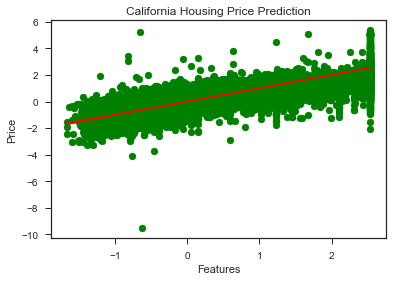

In [44]:
#Visualize the Training set
plt.scatter(housing_results_normalized['y_train'],
            housing_results_normalized['TrainPredict'],color = 'green')

plt.plot(housing_results_normalized['y_train'], housing_results_normalized['y_train'], color = 'red')
plt.title('California Housing Price Prediction')
plt.xlabel("Features")
plt.ylabel('Price')
plt.show()

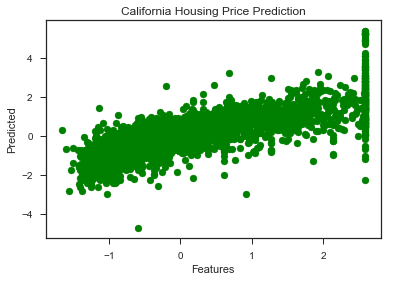

In [45]:
#Visualize the Test set
plt.scatter(housing_results_normalized_test['y_test'], housing_results_normalized_test['TestPredict'], color = 'green')
#plt.plot(X_train, regressoragent.predict (X_train), color = 'red')
plt.title('California Housing Price Prediction')
plt.xlabel("Features")
plt.ylabel('Predicted')
plt.show()

In [123]:
#Step 7: Perform Decision Tree Regression

#Perform Decision Tree Regression on training data. Predict output for test dataset using the fitted model. Print root mean squared error from Decision Tree Regression.

In [124]:
#Step 8: Perform Random Forest Regression

#Perform Random Forest Regression on training data. Predict output for test dataset using the fitted model. Print RMSE (root mean squared error) from Random Forest Regression.

In [ ]:
#Step 9: Bonus excercise: Perform Linear Regression

#Extract just the median_income column from the independent variables (from X_train and X_test). Perform Linear Regression to predict housing values based on median_income. Predict output for test dataset using the fitted model. Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.